<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

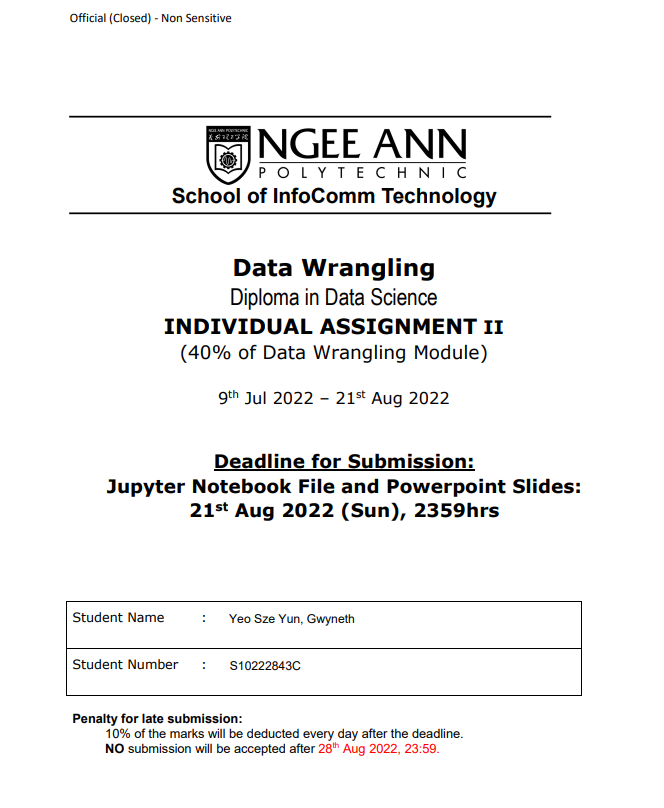

## TABLE OF CONTENTS
### [Importing of packages](#import)
### [Step 1: Load and Explore the Data](#loadnexploredata)
### [Step 2: Data Wrangling on multiple chosen tables and Data Cleansing](#mergenclean)
### [Step 3: Train and Test Split](#tts)
### [Step 4: Distribution and Transforming of Numerical Variables](#numeric)
### [Step 5: Categorical Data Encoding](#categorical)
### [Step 6: Variable Discretization / Binning](#binning)
### [Step 7: Feature Engineer](#scaling)
### [Step 8: Machine Learning Modelling](#model)
### [Report](#report)

### Importing of packages <a id="import"></a>


In [1]:
# import the packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split

from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.transformation import PowerTransformer

from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import OneHotEncoder

from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualWidthDiscretiser

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy import stats

### Step 1: Load and Explore the Data <a id="loadnexploredata"></a>

#### Load all the files to explore the data

In [2]:
status = pd.read_csv("./status_mod.csv")
seasons = pd.read_csv("./seasons_mod.csv")
results = pd.read_csv("./results_mod.csv")
races = pd.read_csv("./races_mod.csv")
qualifying = pd.read_csv("./qualifying_mod.csv")
pit_stops = pd.read_csv("./pit_stops_mod.csv")
lap_times = pd.read_csv("./lap_times_mod.csv")
drivers = pd.read_csv("./drivers_mod.csv")
driver_standings = pd.read_csv("./driver_standings_mod.csv")
constructors = pd.read_csv("./constructors_mod.csv")
constructor_standings = pd.read_csv("./constructor_standings_mod.csv")
constructor_results = pd.read_csv("./constructor_results_mod.csv")
circuits = pd.read_csv("./circuits_mod.csv")

#### Viewing and understanding the data

##### Status

In [3]:
status

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
132,135,Brake duct
133,136,Seat
134,137,Damage
135,138,Debris


##### Seasons

In [4]:
seasons

,year,url
0,2009,https://en.wikipedia.org/wiki/2009_Formula_One...
1,2008,https://en.wikipedia.org/wiki/2008_Formula_One...
2,2007,https://en.wikipedia.org/wiki/2007_Formula_One...
3,2006,https://en.wikipedia.org/wiki/2006_Formula_One...
4,2005,https://en.wikipedia.org/wiki/2005_Formula_One...
...,...,...
68,2018,https://en.wikipedia.org/wiki/2018_Formula_One...
69,2019,https://en.wikipedia.org/wiki/2019_Formula_One...
70,2020,https://en.wikipedia.org/wiki/2020_Formula_One...
71,2021,https://en.wikipedia.org/wiki/2021_Formula_One...


##### Results

In [5]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25394,25400,1073,815,9,11,4,15,15,15,0.0,55,\N,\N,51,2,01:26.4,219.993,5
25395,25401,1073,849,3,6,16,\N,R,16,0.0,50,\N,\N,30,15,01:29.3,212.912,3
25396,25402,1073,841,51,99,14,\N,R,17,0.0,33,\N,\N,33,16,01:29.4,212.557,6
25397,25403,1073,847,3,63,17,\N,R,18,0.0,26,\N,\N,23,19,01:30.6,209.732,6


##### Races

In [6]:
races

,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...
1075,1092,19,22,Japanese Grand Prix,10/9/2022,5:10:00,https://en.wikipedia.org/wiki/2022_Japanese_Gr...
1076,1093,20,69,United States Grand Prix,10/23/2022,19:00:00,https://en.wikipedia.org/wiki/2022_United_Stat...
1077,1094,21,32,Mexico City Grand Prix,10/30/2022,19:00:00,https://en.wikipedia.org/wiki/2022_Mexican_Gra...
1078,1095,22,18,São Paulo Grand Prix,11/13/2022,17:00:00,https://en.wikipedia.org/wiki/2022_S%C3%A3o_Pa...


##### Qualifying 

In [7]:
qualifying

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
9130,9171,1073,849,3,6,16,1:24.338,\N,\N
9131,9172,1073,847,3,63,17,1:24.423,\N,\N
9132,9173,1073,8,51,7,18,1:24.779,\N,\N
9133,9174,1073,854,210,47,19,1:24.906,\N,\N


##### Pit stops

In [8]:
pit_stops

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8823,1073,840,2,52,18:22:55,22.661,22661
8824,1073,815,3,53,18:23:09,21.385,21385
8825,1073,854,2,52,18:23:42,22.070,22070
8826,1073,852,2,53,18:24:01,21.909,21909


##### Lap times

In [9]:
lap_times

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
514587,1073,847,22,15,1:30.821,90821
514588,1073,847,23,15,1:30.647,90647
514589,1073,847,24,14,1:31.577,91577
514590,1073,847,25,16,1:32.794,92794


##### Drivers

In [10]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher


##### Driver standings

In [11]:
driver_standings

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10,1,1,1
1,2,18,2,8,2,2,0
2,3,18,3,6,3,3,0
3,4,18,4,5,4,4,0
4,5,18,5,4,5,5,0
...,...,...,...,...,...,...,...
33389,70776,1074,840,0,16,-,0
33390,70777,1074,852,0,17,-,0
33391,70778,1074,830,0,18,-,0
33392,70779,1074,20,0,19,-,0


##### Constructors

In [12]:
constructors

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


##### Constructor standings

In [13]:
constructor_standings

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
12711,27938,1074,210,0.0,6,-,0
12712,27939,1074,1,0.0,7,-,0
12713,27940,1074,131,0.0,8,-,0
12714,27941,1074,9,0.0,9,-,0


##### Constructor results

In [14]:
constructor_results

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
11945,16445,1073,214,6.0,\N
11946,16446,1073,117,0.0,\N
11947,16447,1073,210,0.0,\N
11948,16448,1073,3,0.0,\N


##### Circuits

In [15]:
circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
74,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
75,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
76,77,jeddah,Jeddah Street Circuit,Jeddah,Saudi Arabia,21.54330,39.17280,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
77,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


### Step 2: Data Wrangling on multiple chosen tables and Data Cleansing <a id="mergenclean"></a>

##### Races

In [16]:
races

,raceId,round,circuitId,name,date,time,url
0,1,1,1,Australian Grand Prix,3/29/2009,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2,2,Malaysian Grand Prix,4/5/12009,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,3,17,Chinese Grand Prix,4/19/2009,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,4,3,Bahrain Grand Prix,4/26/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,5,4,Spanish Grand Prix,5/10/2009,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...
1075,1092,19,22,Japanese Grand Prix,10/9/2022,5:10:00,https://en.wikipedia.org/wiki/2022_Japanese_Gr...
1076,1093,20,69,United States Grand Prix,10/23/2022,19:00:00,https://en.wikipedia.org/wiki/2022_United_Stat...
1077,1094,21,32,Mexico City Grand Prix,10/30/2022,19:00:00,https://en.wikipedia.org/wiki/2022_Mexican_Gra...
1078,1095,22,18,São Paulo Grand Prix,11/13/2022,17:00:00,https://en.wikipedia.org/wiki/2022_S%C3%A3o_Pa...


In [17]:
#overview of the race dataset
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raceId     1080 non-null   int64 
 1   round      1080 non-null   int64 
 2   circuitId  1080 non-null   int64 
 3   name       1080 non-null   object
 4   date       1070 non-null   object
 5   time       1080 non-null   object
 6   url        1080 non-null   object
dtypes: int64(3), object(4)
memory usage: 59.2+ KB


In [18]:
#checking for null values
races.isnull().sum()

raceId        0
round         0
circuitId     0
name          0
date         10
time          0
url           0
dtype: int64

In [19]:
#seeing the null columns
races[races['date'].isnull()]

,raceId,round,circuitId,name,date,time,url
26,27,10,10,German Grand Prix,NaN,12:00:00,http://en.wikipedia.org/wiki/2008_German_Grand...
68,69,17,22,Japanese Grand Prix,NaN,14:00:00,http://en.wikipedia.org/wiki/2006_Japanese_Gra...
104,105,16,17,Chinese Grand Prix,NaN,\N,http://en.wikipedia.org/wiki/2004_Chinese_Gran...
897,900,1,1,Australian Grand Prix,NaN,6:00:00,https://en.wikipedia.org/wiki/2014_Australian_...
914,917,18,18,Brazilian Grand Prix,NaN,16:00:00,http://en.wikipedia.org/wiki/2014_Brazilian_Gr...
935,948,1,1,Australian Grand Prix,NaN,5:00:00,https://en.wikipedia.org/wiki/2016_Australian_...
948,961,14,14,Italian Grand Prix,NaN,12:00:00,https://en.wikipedia.org/wiki/2016_Italian_Gra...
978,991,3,17,Chinese Grand Prix,NaN,6:10:00,https://en.wikipedia.org/wiki/2018_Chinese_Gra...
1015,1028,19,69,United States Grand Prix,NaN,19:10:00,https://en.wikipedia.org/wiki/2019_United_Stat...
1047,1062,11,11,Hungarian Grand Prix,NaN,13:00:00,http://en.wikipedia.org/wiki/2021_Hungarian_Gr...


In [20]:
#replace those dates that are out of range
#extract the year and place it into a new column
datelist = []
for i in races['date']:
    i = str(i) #make it into a string in order to split 
    split = i.split("/")
    #if len(split[2]) == 5: #if the year has 5 numbers, take the last 4
    #        split[2] = split[2][-4:]
    if split[0] == 'nan':
        datelist.append(split)
        continue
    else:
        if len(split[2]) == 5:
            split[2] = split[2][-4:]
            
    joinedback = '/'.join(split) #add the '/' back into the date
    datelist.append(joinedback)

races = races.drop(columns = ['date']) #drop date column 
races['date'] = datelist #make a new date column with the replaced dates
races['date'] = pd.to_datetime(races['date'], errors='coerce') #change the datatype of the variables in the date column to extract the year, will ignore all non-numeric values and change them into Nan
races['year'] = races['date'].dt.year #extract the year out and place it into a new column 

In [21]:
#create a column by extracting the year from the url 
races['year2'] = races['url'].astype(str).str.replace('_','/')
races['year2'] = races['year2'].str.split('/')
races['year2'] = races['year2'].str[4]
races

,raceId,round,circuitId,name,time,url,date,year,year2
0,1,1,1,Australian Grand Prix,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,2009-03-29,2009.0,2009
1,2,2,2,Malaysian Grand Prix,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,2009-04-05,2009.0,2009
2,3,3,17,Chinese Grand Prix,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,2009-04-19,2009.0,2009
3,4,4,3,Bahrain Grand Prix,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,2009-04-26,2009.0,2009
4,5,5,4,Spanish Grand Prix,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,2009-05-10,2009.0,2009
...,...,...,...,...,...,...,...,...,...
1075,1092,19,22,Japanese Grand Prix,5:10:00,https://en.wikipedia.org/wiki/2022_Japanese_Gr...,2022-10-09,2022.0,2022
1076,1093,20,69,United States Grand Prix,19:00:00,https://en.wikipedia.org/wiki/2022_United_Stat...,2022-10-23,2022.0,2022
1077,1094,21,32,Mexico City Grand Prix,19:00:00,https://en.wikipedia.org/wiki/2022_Mexican_Gra...,2022-10-30,2022.0,2022
1078,1095,22,18,São Paulo Grand Prix,17:00:00,https://en.wikipedia.org/wiki/2022_S%C3%A3o_Pa...,2022-11-13,2022.0,2022


In [22]:
#replace the blanks years with the year extracted from the url 
races['year'].fillna(0,inplace = True)
for i in range(len(races)):
    if races.iloc[i,7] == 0:
        races.iloc[i,7] = races.iloc[i,8]
    else:
        continue

In [23]:
#check for null values
races.isnull().sum()

raceId        0
round         0
circuitId     0
name          0
time          0
url           0
date         10
year          0
year2         0
dtype: int64

In [24]:
#change datatype of year to integer so that can use for calculation 
races['year'] = races['year'].astype(int)

In [25]:
#view of all the unique year values
races['year'].unique()

array([2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 2010, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978,
       1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967,
       1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956,
       1955, 1954, 1953, 1952, 1951, 1950, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [26]:
races = races.loc[races['year'] >= 2006] #filter out those years that are before 2006
races

,raceId,round,circuitId,name,time,url,date,year,year2
0,1,1,1,Australian Grand Prix,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,2009-03-29,2009,2009
1,2,2,2,Malaysian Grand Prix,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,2009-04-05,2009,2009
2,3,3,17,Chinese Grand Prix,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,2009-04-19,2009,2009
3,4,4,3,Bahrain Grand Prix,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,2009-04-26,2009,2009
4,5,5,4,Spanish Grand Prix,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,2009-05-10,2009,2009
...,...,...,...,...,...,...,...,...,...
1075,1092,19,22,Japanese Grand Prix,5:10:00,https://en.wikipedia.org/wiki/2022_Japanese_Gr...,2022-10-09,2022,2022
1076,1093,20,69,United States Grand Prix,19:00:00,https://en.wikipedia.org/wiki/2022_United_Stat...,2022-10-23,2022,2022
1077,1094,21,32,Mexico City Grand Prix,19:00:00,https://en.wikipedia.org/wiki/2022_Mexican_Gra...,2022-10-30,2022,2022
1078,1095,22,18,São Paulo Grand Prix,17:00:00,https://en.wikipedia.org/wiki/2022_S%C3%A3o_Pa...,2022-11-13,2022,2022


In [27]:
#check if all years before 2006 has been filtered out
races['year'].unique()

array([2009, 2008, 2007, 2006, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022])

In [28]:
#drop irrelevant columns
races = races.drop(columns=["date", "time","url","round","year2"])
#overview of new races table
races

,raceId,circuitId,name,year
0,1,1,Australian Grand Prix,2009
1,2,2,Malaysian Grand Prix,2009
2,3,17,Chinese Grand Prix,2009
3,4,3,Bahrain Grand Prix,2009
4,5,4,Spanish Grand Prix,2009
...,...,...,...,...
1075,1092,22,Japanese Grand Prix,2022
1076,1093,69,United States Grand Prix,2022
1077,1094,32,Mexico City Grand Prix,2022
1078,1095,18,São Paulo Grand Prix,2022


##### Results

In [29]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25394,25400,1073,815,9,11,4,15,15,15,0.0,55,\N,\N,51,2,01:26.4,219.993,5
25395,25401,1073,849,3,6,16,\N,R,16,0.0,50,\N,\N,30,15,01:29.3,212.912,3
25396,25402,1073,841,51,99,14,\N,R,17,0.0,33,\N,\N,33,16,01:29.4,212.557,6
25397,25403,1073,847,3,63,17,\N,R,18,0.0,26,\N,\N,23,19,01:30.6,209.732,6


In [30]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25399 non-null  int64  
 1   raceId           25399 non-null  int64  
 2   driverId         25399 non-null  int64  
 3   constructorId    25399 non-null  int64  
 4   number           25399 non-null  object 
 5   grid             25399 non-null  int64  
 6   position         25399 non-null  object 
 7   positionText     25399 non-null  object 
 8   positionOrder    25399 non-null  int64  
 9   points           25399 non-null  float64
 10  laps             25399 non-null  int64  
 11  time             25399 non-null  object 
 12  milliseconds     25399 non-null  object 
 13  fastestLap       25399 non-null  object 
 14  rank             25399 non-null  object 
 15  fastestLapTime   25399 non-null  object 
 16  fastestLapSpeed  25399 non-null  object 
 17  statusId    

In [31]:
results.isnull().sum()

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [32]:
#checking if there are any abnormal values in position order
results['positionOrder'].value_counts()

3     1067
4     1067
2     1066
11    1065
5     1064
6     1064
7     1064
8     1064
9     1063
12    1062
10    1062
13    1058
14    1054
15    1052
16    1039
17    1032
18    1017
19     994
1      990
20     978
21     745
22     716
23     505
24     478
25     386
26     349
27     270
28     221
29     180
30     156
31     117
32      79
99      70
33      65
34      46
35      29
36      18
37      17
38      17
39      13
Name: positionOrder, dtype: int64

In [33]:
#check which races have position order as 99
results[results['positionOrder']==99]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
268,269,31,20,5,15,1,99,99,99,10.0,53,26:47.5,5207494,53,14,01:30.5,230.414,1
288,289,32,4,4,5,15,99,99,99,10.0,61,57:16.3,7036304,55,3,01:45.8,172.464,1
308,309,33,4,4,5,4,99,99,99,10.0,67,30:21.9,5421892,41,3,01:19.1,207.668,1
328,329,34,1,1,22,1,99,99,99,10.0,56,31:57.4,5517403,13,1,01:36.3,203.722,1
368,369,36,8,6,6,1,99,99,99,10.0,58,25:28.8,5128770,41,1,01:25.2,223.978,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25300,25306,1070,830,9,33,3,99,99,99,25.0,71,38:39.1,5919086,52,2,01:19.0,196.134,1
25320,25326,1071,1,131,44,10,99,99,99,25.0,71,32:22.9,5542851,46,2,01:12.0,215.503,1
25340,25346,1051,1,131,44,1,99,99,99,25.0,57,24:28.5,5068471,50,2,01:25.1,227.633,1
25360,25366,1072,1,131,44,1,99,99,99,26.0,50,06:15.1,7575118,47,1,01:30.7,244.962,1


In [34]:
#check the race results of when the position order is 99
#below is one example
results[results['raceId']==31]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
268,269,31,20,5,15,1,99,99,99,10.0,53,26:47.5,5207494,53,14,01:30.5,230.414,1
269,270,31,5,1,23,2,2,2,2,8.0,53,12.512,5220006,53,13,01:30.3,230.95,1
270,271,31,9,2,4,11,3,3,3,6.0,53,20.471,5227965,52,12,01:30.3,230.955,1
271,272,31,4,4,5,8,4,4,4,5.0,53,23.903,5231397,51,9,01:30.0,231.82,1
272,273,31,2,2,3,10,5,5,5,4.0,53,27.748,5235242,53,6,01:29.8,232.217,1
273,274,31,13,6,2,6,6,6,6,3.0,53,28.816,5236310,52,4,01:29.7,232.505,1
274,275,31,1,1,22,15,7,7,7,2.0,53,29.912,5237406,52,5,01:29.7,232.44,1
275,276,31,17,9,10,3,8,8,8,1.0,53,32.048,5239542,52,3,01:29.7,232.544,1
276,277,31,8,6,1,14,9,9,9,0.0,53,39.468,5246962,53,1,01:28.0,236.859,1
277,278,31,12,4,6,17,10,10,10,0.0,53,54.445,5261939,53,16,01:30.9,229.38,1


In [35]:
#since there are position order with 99, replace 99 with 1
results['positionOrder'] = np.where(results['positionOrder'] == 99, 1, results['positionOrder'])
results['positionOrder'].value_counts()

3     1067
4     1067
2     1066
11    1065
5     1064
6     1064
7     1064
8     1064
9     1063
10    1062
12    1062
1     1060
13    1058
14    1054
15    1052
16    1039
17    1032
18    1017
19     994
20     978
21     745
22     716
23     505
24     478
25     386
26     349
27     270
28     221
29     180
30     156
31     117
32      79
33      65
34      46
35      29
36      18
37      17
38      17
39      13
Name: positionOrder, dtype: int64

In [36]:
#checking if there are any adnormal values in grid 
results['grid'].value_counts()

0     1598
1     1068
7     1067
4     1064
11    1064
9     1064
5     1064
10    1063
3     1062
8     1062
12    1059
2     1058
13    1058
6     1057
14    1052
15    1045
16    1032
17    1021
18     984
19     970
20     934
21     697
22     656
23     453
24     429
25     301
26     248
27      46
28      30
29      25
30      19
31      18
32      17
33      13
34       1
Name: grid, dtype: int64

In [37]:
#creating target column 
results['target']=np.where(results['positionOrder']<4 , 1, 0)

In [38]:
#choosing relevant columns 
results = results.loc[0:,["resultId","raceId","driverId","grid","target"]]
#overview of new results table
results

,resultId,raceId,driverId,grid,target
0,1,18,1,1,1
1,2,18,2,5,1
2,3,18,3,7,1
3,4,18,4,11,0
4,5,18,5,3,0
...,...,...,...,...,...
25394,25400,1073,815,4,0
25395,25401,1073,849,16,0
25396,25402,1073,841,14,0
25397,25403,1073,847,17,0


##### Qualifying

In [39]:
#overview of qualifying
qualifying

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
9130,9171,1073,849,3,6,16,1:24.338,\N,\N
9131,9172,1073,847,3,63,17,1:24.423,\N,\N
9132,9173,1073,8,51,7,18,1:24.779,\N,\N
9133,9174,1073,854,210,47,19,1:24.906,\N,\N


In [40]:
qualifying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9135 entries, 0 to 9134
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9135 non-null   int64 
 1   raceId         9135 non-null   int64 
 2   driverId       9135 non-null   int64 
 3   constructorId  9135 non-null   int64 
 4   number         9135 non-null   int64 
 5   position       9135 non-null   int64 
 6   q1             9127 non-null   object
 7   q2             9001 non-null   object
 8   q3             8880 non-null   object
dtypes: int64(6), object(3)
memory usage: 642.4+ KB


In [41]:
#check if there is null values
qualifying.isnull().sum()

qualifyId          0
raceId             0
driverId           0
constructorId      0
number             0
position           0
q1                 8
q2               134
q3               255
dtype: int64

In [42]:
#replace the null values with 0 
qualifying = qualifying.replace(np.nan,0)

In [43]:
#double check if all null values are replaced
qualifying.isnull().sum()

qualifyId        0
raceId           0
driverId         0
constructorId    0
number           0
position         0
q1               0
q2               0
q3               0
dtype: int64

In [44]:
#replace non classified value with 0 
qualifying = qualifying.replace(r'\N',0)

In [45]:
#check the rows when q1 = 0 
qualifying[qualifying['q1']==0].head(50)

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
147,148,24,20,5,15,20,0,0,0
307,308,32,21,10,21,20,0,0,0
455,456,39,26,5,19,22,0,0,0
477,478,40,27,12,21,22,0,0,0
763,764,53,8,1,3,22,0,0,0
873,874,58,14,9,14,22,0,0,0
894,895,59,13,6,6,21,0,0,0
895,896,59,30,6,5,22,0,0,0
917,918,60,15,7,8,22,0,0,0
1005,1006,64,26,5,21,22,0,0,0


In [46]:
#drop rows where q1 = 0
qualifying.drop(qualifying.loc[qualifying['q1']==0].index, inplace=True)

In [47]:
#check if all 0 values of q1 are dropped
qualifying[qualifying['q1']==0]

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3


In [48]:
#convert minutes and seconds of qualifying timing to seconds
qualifying['q1'] = qualifying['q1'].str.split(":")
qualifying['q1_secs'] = qualifying['q1'].str[0] 
qualifying['q1_secs'] = qualifying['q1_secs'].astype(float)*60
qualifying['q1_secs'] = qualifying['q1_secs']+qualifying['q1'].str[1].astype(float)

qualifying['q2'] = qualifying['q2'].str.split(":")
qualifying['q2_secs'] = qualifying['q2'].str[0] 
qualifying['q2_secs'] = qualifying['q2_secs'].astype(float)*60
qualifying['q2_secs'] = qualifying['q2_secs']+qualifying['q2'].str[1].astype(float)

qualifying['q3'] = qualifying['q3'].str.split(":")
qualifying['q3_secs'] = qualifying['q3'].str[0] 
qualifying['q3_secs'] = qualifying['q3_secs'].astype(float)*60
qualifying['q3_secs'] = qualifying['q3_secs']+qualifying['q3'].str[1].astype(float)

qualifying

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3,q1_secs,q2_secs,q3_secs
0,1,18,1,1,22,1,"[1, 26.572]","[1, 25.187]","[1, 26.714]",86.572,85.187,86.714
1,2,18,9,2,4,2,"[1, 26.103]","[1, 25.315]","[1, 26.869]",86.103,85.315,86.869
2,3,18,5,1,23,3,"[1, 25.664]","[1, 25.452]","[1, 27.079]",85.664,85.452,87.079
3,4,18,13,6,2,4,"[1, 25.994]","[1, 25.691]","[1, 27.178]",85.994,85.691,87.178
4,5,18,2,2,3,5,"[1, 25.960]","[1, 25.518]","[1, 27.236]",85.960,85.518,87.236
...,...,...,...,...,...,...,...,...,...,...,...,...
9130,9171,1073,849,3,6,16,"[1, 24.338]",NaN,NaN,84.338,NaN,NaN
9131,9172,1073,847,3,63,17,"[1, 24.423]",NaN,NaN,84.423,NaN,NaN
9132,9173,1073,8,51,7,18,"[1, 24.779]",NaN,NaN,84.779,NaN,NaN
9133,9174,1073,854,210,47,19,"[1, 24.906]",NaN,NaN,84.906,NaN,NaN


In [49]:
qualifying = qualifying.replace(np.nan,0)

In [50]:
#dropping columns that is irrelevant
qualifying = qualifying.drop(columns=["constructorId","number","q1","q2","q3"])
#overview of new qualifying table 
qualifying

,qualifyId,raceId,driverId,position,q1_secs,q2_secs,q3_secs
0,1,18,1,1,86.572,85.187,86.714
1,2,18,9,2,86.103,85.315,86.869
2,3,18,5,3,85.664,85.452,87.079
3,4,18,13,4,85.994,85.691,87.178
4,5,18,2,5,85.960,85.518,87.236
...,...,...,...,...,...,...,...
9130,9171,1073,849,16,84.338,0.000,0.000
9131,9172,1073,847,17,84.423,0.000,0.000
9132,9173,1073,8,18,84.779,0.000,0.000
9133,9174,1073,854,19,84.906,0.000,0.000


##### Circuits

In [51]:
#overview of circuits
circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
74,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
75,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
76,77,jeddah,Jeddah Street Circuit,Jeddah,Saudi Arabia,21.54330,39.17280,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
77,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


In [52]:
circuits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   79 non-null     int64  
 1   circuitRef  79 non-null     object 
 2   name        79 non-null     object 
 3   location    79 non-null     object 
 4   country     79 non-null     object 
 5   lat         79 non-null     float64
 6   lng         79 non-null     float64
 7   alt         79 non-null     object 
 8   url         79 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.7+ KB


In [53]:
#checking for null values
circuits.isnull().sum()

circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64

In [54]:
#replace non classified values with null 
circuits = circuits.replace(r'\N',np.nan)
circuits.dropna(inplace=True)

In [55]:
#changed datatype of altitude to integer 
circuits['alt'] = circuits['alt'].astype(int)
circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
72,73,BAK,Baku City Circuit,Baku,Azerbaijan,40.37250,49.85330,-7,http://en.wikipedia.org/wiki/Baku_City_Circuit
73,74,hanoi,Hanoi Street Circuit,Hanoi,Vietnam,21.01660,105.76600,9,http://en.wikipedia.org/wiki/Hanoi_Street_Circuit
74,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
75,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit


In [56]:
#choosing of relevant columns
circuits = circuits.loc[0:,['circuitId','name','alt']]
#overview of new circuit table
circuits

,circuitId,name,alt
0,1,Albert Park Grand Prix Circuit,10
1,2,Sepang International Circuit,18
2,3,Bahrain International Circuit,7
3,4,Circuit de Barcelona-Catalunya,109
4,5,Istanbul Park,130
...,...,...,...
72,73,Baku City Circuit,-7
73,74,Hanoi Street Circuit,9
74,75,Autódromo Internacional do Algarve,108
75,76,Autodromo Internazionale del Mugello,255


##### Drivers

In [57]:
#overview of drivers
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,22,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,9,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher


In [58]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


In [59]:
#check for any null values
drivers.isnull().sum()

driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

In [60]:
#combine driver's forename and surname
drivers['driver_name'] = drivers['forename']+' '+drivers['surname']

In [61]:
#choosing of relevant columns 
drivers = drivers.loc[0:,['driverId','dob','driver_name']]
#overview of new drivers dataset 
drivers

,driverId,dob,driver_name
0,1,1985-01-07,Lewis Hamilton
1,2,1977-05-10,Nick Heidfeld
2,3,1985-06-27,Nico Rosberg
3,4,1981-07-29,Fernando Alonso
4,5,1981-10-19,Heikki Kovalainen
...,...,...,...
849,851,1995-09-23,Jack Aitken
850,852,2000-05-11,Yuki Tsunoda
851,853,1999-03-02,Nikita Mazepin
852,854,1999-03-22,Mick Schumacher


#### Merging of multiple tables into a tabular table

In [62]:
f1_df = pd.merge(races,circuits,on='circuitId',how='inner').drop_duplicates()

In [63]:
f1_df = pd.merge(f1_df,qualifying,on='raceId',how='inner').drop_duplicates()

In [64]:
f1_df = pd.merge(f1_df,drivers,on='driverId',how='inner').drop_duplicates()

In [65]:
f1_df = pd.merge(f1_df,results,on=['raceId','driverId'],how='inner').drop_duplicates()

In [66]:
#overview of new dataset
f1_df

,raceId,circuitId,name_x,year,name_y,alt,qualifyId,driverId,position,q1_secs,q2_secs,q3_secs,dob,driver_name,resultId,grid,target
0,1,1,Australian Grand Prix,2009,Albert Park Grand Prix Circuit,10,2986,18,1,85.211,84.855,86.202,1980-01-19,Jenson Button,7554,1,1
1,18,1,Australian Grand Prix,2008,Albert Park Grand Prix Circuit,10,13,18,13,86.712,86.259,0.000,1980-01-19,Jenson Button,18,12,0
2,36,1,Australian Grand Prix,2007,Albert Park Grand Prix Circuit,10,382,18,14,87.540,87.264,0.000,1980-01-19,Jenson Button,383,14,0
3,55,1,Australian Grand Prix,2006,Albert Park Grand Prix Circuit,10,787,18,1,88.081,86.337,85.229,1980-01-19,Jenson Button,796,1,0
4,338,1,Australian Grand Prix,2010,Albert Park Grand Prix Circuit,10,3353,18,4,84.897,84.531,84.675,1980-01-19,Jenson Button,20347,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6443,939,15,Singapore Grand Prix,2015,Marina Bay Street Circuit,18,6563,834,20,111.523,0.000,0.000,1991-09-25,Alexander Rossi,22789,20,0
6444,940,22,Japanese Grand Prix,2015,Suzuka Circuit,45,6583,834,20,107.114,0.000,0.000,1991-09-25,Alexander Rossi,22813,19,0
6445,944,18,Brazilian Grand Prix,2015,Autódromo José Carlos Pace,785,6660,834,18,76.151,0.000,0.000,1991-09-25,Alexander Rossi,22894,17,0
6446,942,69,United States Grand Prix,2015,Circuit of the Americas,161,6620,834,18,124.176,0.000,0.000,1991-09-25,Alexander Rossi,22848,17,0


#### Creating of new columns 

In [67]:
#create age column
f1_df['age'] = f1_df['year'] - pd.to_datetime(f1_df['dob']).dt.year

#### Formatting and overview of final table

In [68]:
f1_df = f1_df.drop(columns=['raceId','circuitId','qualifyId','driverId','dob','resultId'])
f1_df

,name_x,year,name_y,alt,position,q1_secs,q2_secs,q3_secs,driver_name,grid,target,age
0,Australian Grand Prix,2009,Albert Park Grand Prix Circuit,10,1,85.211,84.855,86.202,Jenson Button,1,1,29
1,Australian Grand Prix,2008,Albert Park Grand Prix Circuit,10,13,86.712,86.259,0.000,Jenson Button,12,0,28
2,Australian Grand Prix,2007,Albert Park Grand Prix Circuit,10,14,87.540,87.264,0.000,Jenson Button,14,0,27
3,Australian Grand Prix,2006,Albert Park Grand Prix Circuit,10,1,88.081,86.337,85.229,Jenson Button,1,0,26
4,Australian Grand Prix,2010,Albert Park Grand Prix Circuit,10,4,84.897,84.531,84.675,Jenson Button,4,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...
6443,Singapore Grand Prix,2015,Marina Bay Street Circuit,18,20,111.523,0.000,0.000,Alexander Rossi,20,0,24
6444,Japanese Grand Prix,2015,Suzuka Circuit,45,20,107.114,0.000,0.000,Alexander Rossi,19,0,24
6445,Brazilian Grand Prix,2015,Autódromo José Carlos Pace,785,18,76.151,0.000,0.000,Alexander Rossi,17,0,24
6446,United States Grand Prix,2015,Circuit of the Americas,161,18,124.176,0.000,0.000,Alexander Rossi,17,0,24


In [69]:
f1_df = f1_df.rename(columns = {'name_x':'grand_prix_name','name_y':'circuit_name','position':'qualifying_position'})

In [70]:
f1_df['year'] = f1_df['year'].astype(object)
f1_df['qualifying_position'] = f1_df['qualifying_position'].astype(object)
f1_df['grid'] = f1_df['grid'].astype(object)

In [71]:
#information of the new tabular data table
f1_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6448 entries, 0 to 6447
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grand_prix_name      6448 non-null   object 
 1   year                 6448 non-null   object 
 2   circuit_name         6448 non-null   object 
 3   alt                  6448 non-null   int32  
 4   qualifying_position  6448 non-null   object 
 5   q1_secs              6448 non-null   float64
 6   q2_secs              6448 non-null   float64
 7   q3_secs              6448 non-null   float64
 8   driver_name          6448 non-null   object 
 9   grid                 6448 non-null   object 
 10  target               6448 non-null   int32  
 11  age                  6448 non-null   int64  
dtypes: float64(3), int32(2), int64(1), object(6)
memory usage: 604.5+ KB


In [72]:
#description of the tabular data table
f1_df.describe()

,alt,q1_secs,q2_secs,q3_secs,target,age
count,6448.000000,6448.000000,6448.000000,6448.000000,6448.000000,6448.000000
mean,200.148418,89.351708,64.573318,40.376227,0.141594,27.926954
std,352.981098,12.675227,40.536385,44.648179,0.348661,5.041177
min,-7.000000,53.904000,0.000000,0.000000,0.000000,18.000000
25%,7.000000,78.919250,0.000000,0.000000,0.000000,24.000000
50%,103.000000,88.365500,80.890000,0.000000,0.000000,27.000000
75%,223.000000,97.769750,93.752250,85.779000,0.000000,31.000000
max,2227.000000,141.611000,132.470000,129.776000,1.000000,43.000000


In [73]:
#checking for null and missing values 
f1_df.isnull().sum()

grand_prix_name        0
year                   0
circuit_name           0
alt                    0
qualifying_position    0
q1_secs                0
q2_secs                0
q3_secs                0
driver_name            0
grid                   0
target                 0
age                    0
dtype: int64

In [74]:
#overview of final dataset
f1_df

,grand_prix_name,year,circuit_name,alt,qualifying_position,q1_secs,q2_secs,q3_secs,driver_name,grid,target,age
0,Australian Grand Prix,2009,Albert Park Grand Prix Circuit,10,1,85.211,84.855,86.202,Jenson Button,1,1,29
1,Australian Grand Prix,2008,Albert Park Grand Prix Circuit,10,13,86.712,86.259,0.000,Jenson Button,12,0,28
2,Australian Grand Prix,2007,Albert Park Grand Prix Circuit,10,14,87.540,87.264,0.000,Jenson Button,14,0,27
3,Australian Grand Prix,2006,Albert Park Grand Prix Circuit,10,1,88.081,86.337,85.229,Jenson Button,1,0,26
4,Australian Grand Prix,2010,Albert Park Grand Prix Circuit,10,4,84.897,84.531,84.675,Jenson Button,4,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...
6443,Singapore Grand Prix,2015,Marina Bay Street Circuit,18,20,111.523,0.000,0.000,Alexander Rossi,20,0,24
6444,Japanese Grand Prix,2015,Suzuka Circuit,45,20,107.114,0.000,0.000,Alexander Rossi,19,0,24
6445,Brazilian Grand Prix,2015,Autódromo José Carlos Pace,785,18,76.151,0.000,0.000,Alexander Rossi,17,0,24
6446,United States Grand Prix,2015,Circuit of the Americas,161,18,124.176,0.000,0.000,Alexander Rossi,17,0,24


<AxesSubplot:>

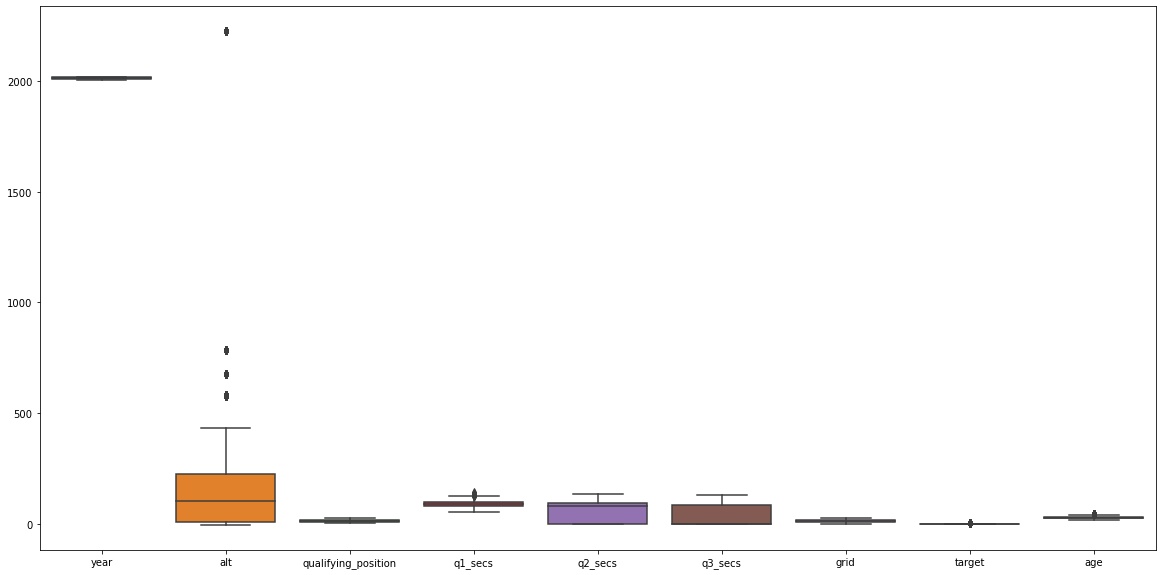

In [75]:
#checking of outliers 
plt.figure(figsize=(20,10))
sns.boxplot(data=f1_df)

### Step 3: Train Test Split <a id="tts"></a>

In [76]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(
    f1_df.drop('target', axis=1), f1_df['target'], test_size=0.3, random_state=0)

In [77]:
#viewing the number of rows and columns in X_train and X_test
X_train.shape, X_test.shape

((4513, 11), (1935, 11))

### Step 4: Distribution and Transforming of Numerical Variables <a id="numeric"></a>

#### Finding numerical variables

In [78]:
X_num_cols = [n for n in X_train.columns if X_train[n].dtypes!='object']
X_train[X_num_cols].head()

,alt,q1_secs,q2_secs,q3_secs,age
5423,5,92.932,92.809,91.796,21
5875,3,99.503,99.646,0.000,19
1284,13,76.745,0.000,0.000,37
658,785,72.040,71.589,72.131,22
1329,5,97.347,96.118,95.972,37


#### Overview of distribution of numerical variables

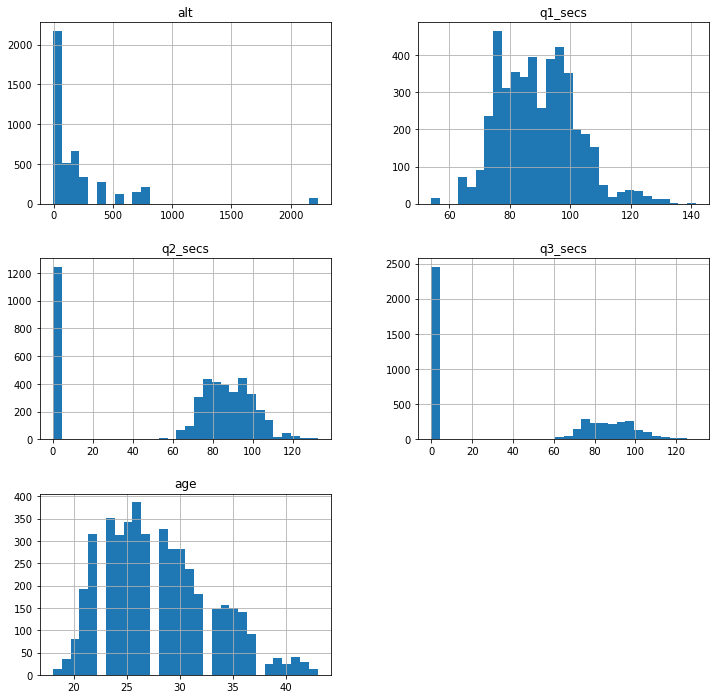

In [79]:
X_train.hist(bins=30, figsize=(12,12))
plt.show()

#### Before transformation

In [80]:
def diagnostic_plots(df, variable):

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


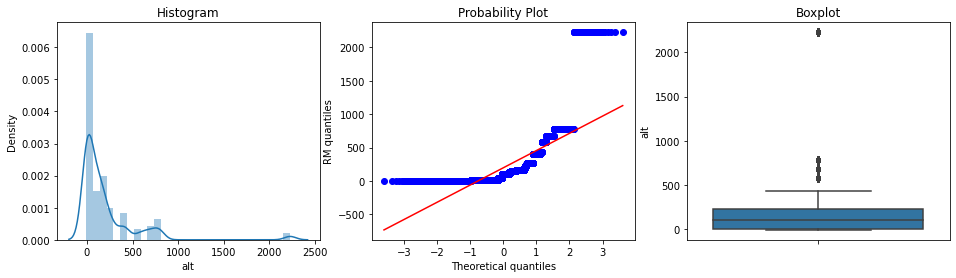

In [81]:
diagnostic_plots(X_train, 'alt')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


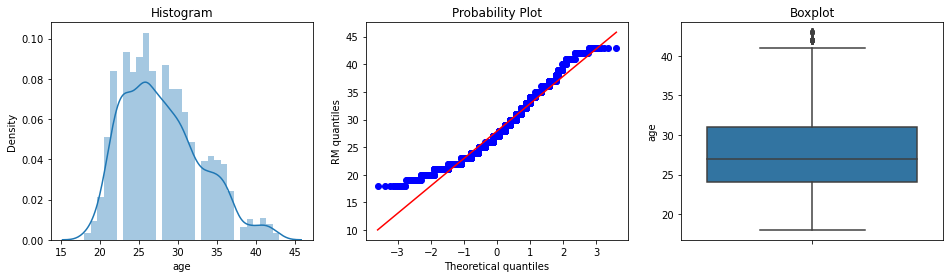

In [82]:
diagnostic_plots(X_train, 'age')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


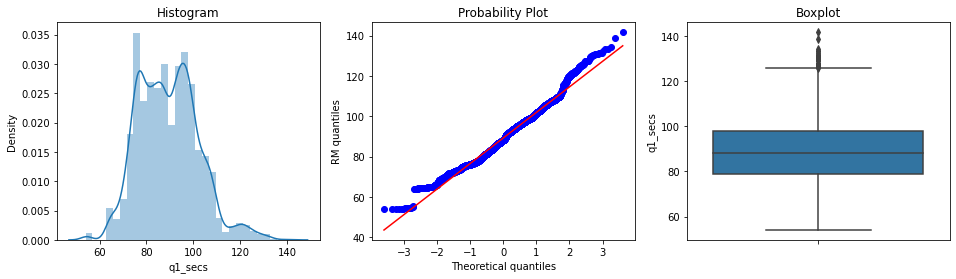

In [83]:
diagnostic_plots(X_train, 'q1_secs')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


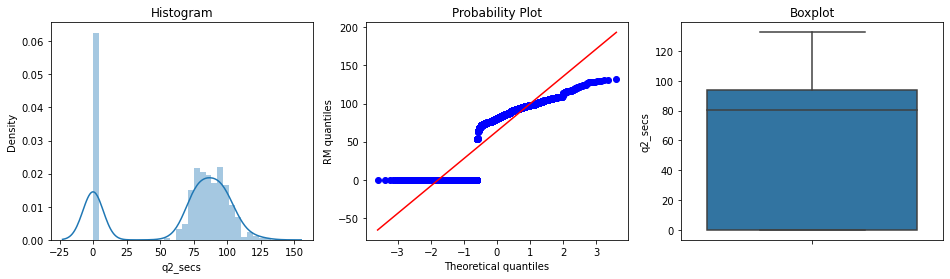

In [84]:
diagnostic_plots(X_train, 'q2_secs')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


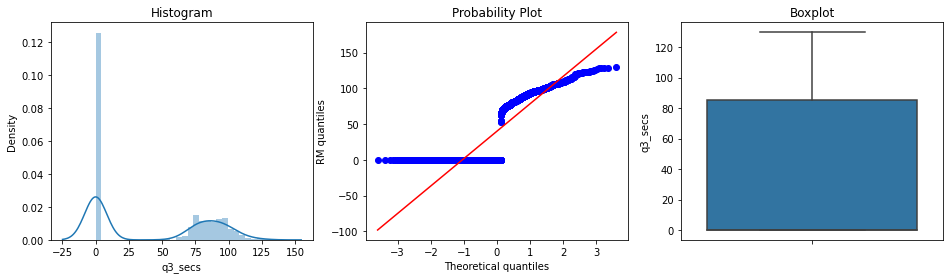

In [85]:
diagnostic_plots(X_train, 'q3_secs')

#### After numerical transformation

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


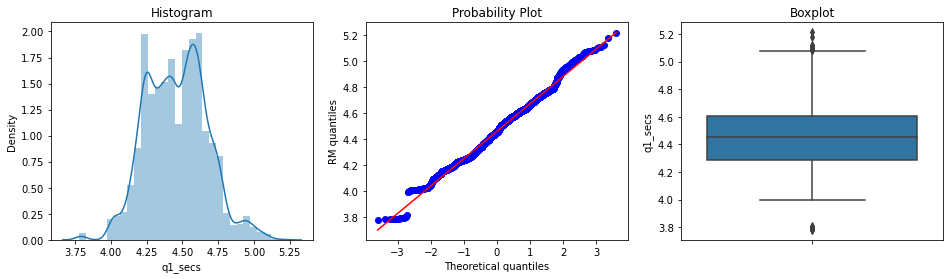

In [86]:
et = PowerTransformer(variables = ['q1_secs'], exp = 1/3)
et.fit(X_train)
X_train_tf = et.transform(X_train)
X_test_tf = et.transform(X_test)
diagnostic_plots(X_train_tf, 'q1_secs')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


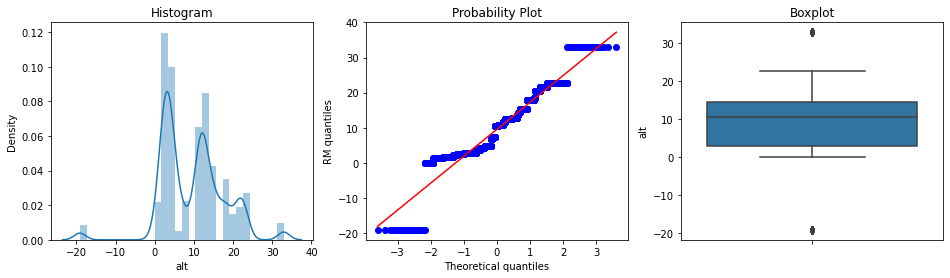

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


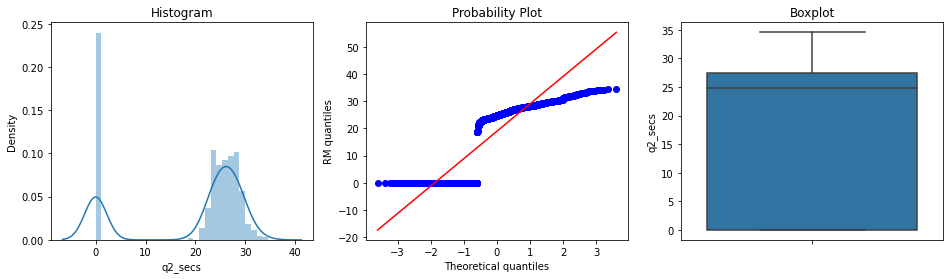

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


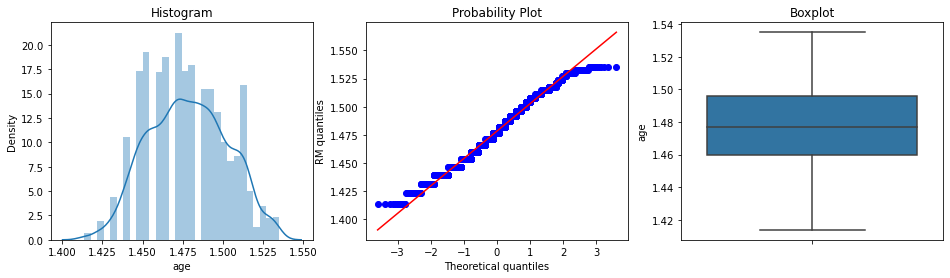

In [87]:
yjt = YeoJohnsonTransformer(variables = ['alt','q2_secs','age'])
yjt.fit(X_train_tf)
X_train_tf = yjt.transform(X_train_tf)
X_test_tf = yjt.transform(X_test_tf)
diagnostic_plots(X_train_tf, 'alt')
diagnostic_plots(X_train_tf, 'q2_secs')
diagnostic_plots(X_train_tf, 'age')

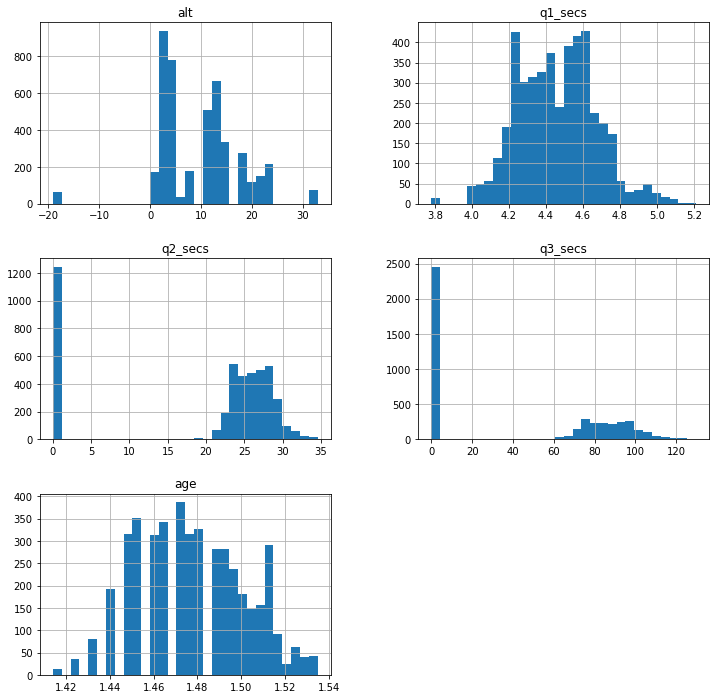

In [88]:
#distribution after numeric transformation
X_train_tf.hist(bins=30, figsize=(12,12))
plt.show()

### Step 5: Categorical Data Encoding <a id="categorical"></a>

#### Finding categorical variables

In [89]:
cat_cols = [c for c in X_train_tf.columns if X_train_tf[c].dtypes=='object']
X_train_tf[cat_cols].head()

,grand_prix_name,year,circuit_name,qualifying_position,driver_name,grid
5423,Chinese Grand Prix,2018,Shanghai International Circuit,5,Max Verstappen,5
5875,Abu Dhabi Grand Prix,2017,Yas Marina Circuit,15,Lance Stroll,15
1284,Canadian Grand Prix,2011,Circuit Gilles Villeneuve,19,Jarno Trulli,18
658,Brazilian Grand Prix,2006,Autódromo José Carlos Pace,9,Robert Kubica,9
1329,Chinese Grand Prix,2016,Shanghai International Circuit,3,Kimi Räikkönen,3


#### Shape of train and test dataset

In [90]:
X_train_tf.shape

(4513, 11)

In [91]:
X_test_tf.shape

(1935, 11)

#### Encoding

In [92]:
ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=['grand_prix_name','circuit_name'])
ordinal_enc.fit(X_train_tf)
X_train_enc = ordinal_enc.transform(X_train_tf)
X_test_enc = ordinal_enc.transform(X_test_tf)

In [93]:
ordinal_enc = OrdinalEncoder(
    encoding_method='ordered',
variables = ['year','qualifying_position','grid'])
ordinal_enc.fit(X_train_enc,y_train)
X_train_enc = ordinal_enc.transform(X_train_enc)
X_test_enc = ordinal_enc.transform(X_test_enc)

In [94]:
ohe_enc = OneHotEncoder(
    top_categories=5,  
    variables=['driver_name'],
    drop_last=False)

ohe_enc.fit(X_train_enc)
X_train_enc = ohe_enc.transform(X_train_enc)
X_test_enc = ohe_enc.transform(X_test_enc)

In [95]:
X_train_enc

,grand_prix_name,year,circuit_name,alt,qualifying_position,q1_secs,q2_secs,q3_secs,grid,age,driver_name_Lewis Hamilton,driver_name_Fernando Alonso,driver_name_Sebastian Vettel,driver_name_Kimi Räikkönen,driver_name_Sergio Pérez
5423,0,14,0,2.409193,19,4.529550,27.246703,91.796,20,1.439464,0,0,0,0,0
5875,1,15,1,1.739164,11,4.633886,28.578664,0.000,9,1.423075,0,0,0,0,0
1284,2,1,2,4.119388,8,4.249619,0.000000,0.000,7,1.517839,0,0,0,0,0
658,3,2,3,22.819355,15,4.160938,22.870602,72.131,15,1.446805,0,0,0,0,0
1329,0,4,0,2.409193,21,4.600173,27.895534,95.972,22,1.517839,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,20,13,22,10.801294,11,4.454505,0.000000,0.000,13,1.446805,0,0,0,0,0
3264,14,13,15,3.585220,17,4.545110,29.345196,106.030,18,1.477115,0,0,0,0,0
1653,10,3,10,12.647700,14,4.406396,25.643232,0.000,14,1.514563,0,0,0,0,0
2607,6,2,6,15.269930,16,4.333327,24.685622,80.924,18,1.503833,0,0,0,0,0


### Step 6: Variable Discretization / Binning <a id="binning"></a>

#### Shape of train and test dataset

In [96]:
X_train_enc.shape

(4513, 15)

In [97]:
X_test_enc.shape

(1935, 15)

#### Distribution of variables

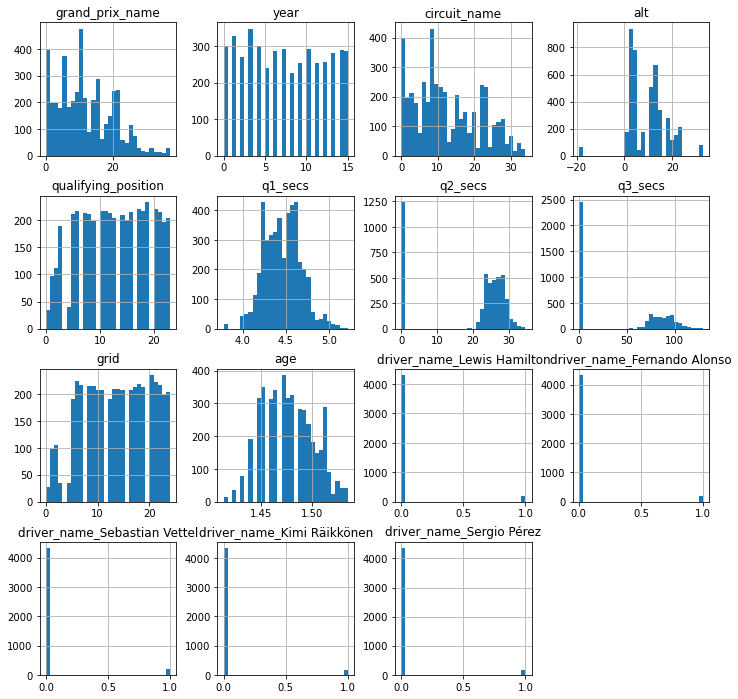

In [98]:
X_train_enc.hist(bins=30, figsize=(12,12))
plt.show()

#### Binning

In [99]:
disc = EqualWidthDiscretiser(bins=10, variables = ['age','q1_secs','q2_secs','q3_secs','alt'])
disc.fit(X_train_enc)
X_train_bin = disc.transform(X_train_enc)
X_test_bin = disc.transform(X_test_enc)

Text(0, 0.5, 'Number of observations per bin')

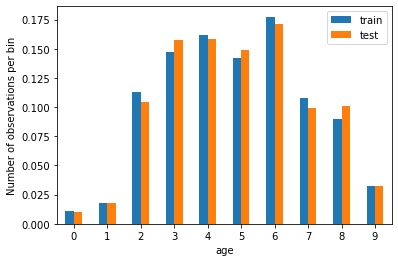

In [100]:
t1 = X_train_bin.groupby(['age'])['age'].count() / len(X_train_bin)
t2 = X_test_bin.groupby(['age'])['age'].count() / len(X_test_bin)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

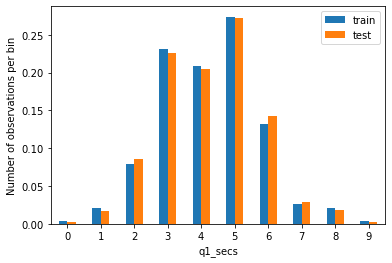

In [101]:
t1 = X_train_bin.groupby(['q1_secs'])['q1_secs'].count() / len(X_train_bin)
t2 = X_test_bin.groupby(['q1_secs'])['q1_secs'].count() / len(X_test_bin)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

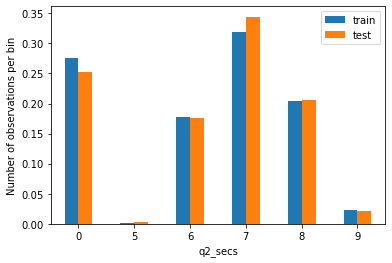

In [102]:
t1 = X_train_bin.groupby(['q2_secs'])['q2_secs'].count() / len(X_train_bin)
t2 = X_test_bin.groupby(['q2_secs'])['q2_secs'].count() / len(X_test_bin)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

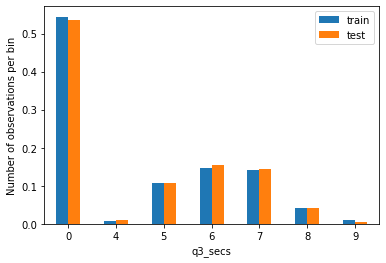

In [103]:
t1 = X_train_bin.groupby(['q3_secs'])['q3_secs'].count() / len(X_train_bin)
t2 = X_test_bin.groupby(['q3_secs'])['q3_secs'].count() / len(X_test_bin)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

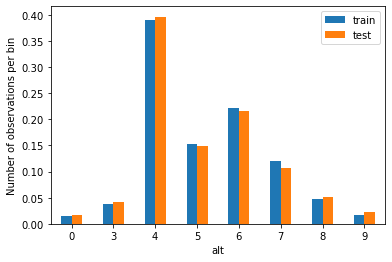

In [104]:
t1 = X_train_bin.groupby(['alt'])['alt'].count() / len(X_train_bin)
t2 = X_test_bin.groupby(['alt'])['alt'].count() / len(X_test_bin)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

### Step 7: Feature Engineer <a id="scaling"></a>

#### Shape of train and test dataset

In [105]:
X_train_bin.shape

(4513, 15)

In [106]:
X_test_bin.shape

(1935, 15)

#### Scaling

In [107]:
scaler = StandardScaler()
scaler.fit(X_train_bin)

# transform train and test sets
X_train_scaled = scaler.transform(X_train_bin)
X_test_scaled = scaler.transform(X_test_bin)

In [108]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_bin.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_bin.columns)

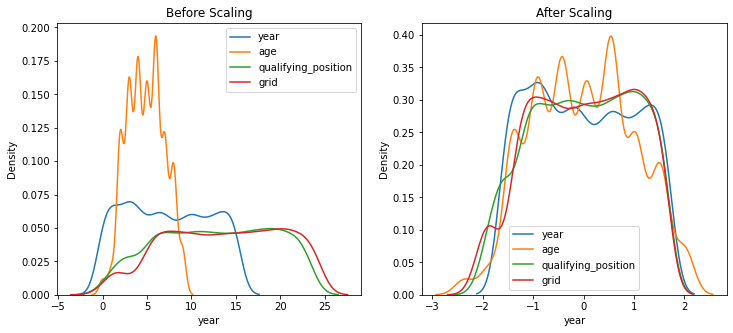

In [109]:
#comparing before and after scaling of numerical variables
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_bin['year'], ax=ax1, label ='year')
sns.kdeplot(X_train_bin['age'], ax=ax1, label ='age')
sns.kdeplot(X_train_bin['qualifying_position'], ax=ax1, label ='qualifying_position')
sns.kdeplot(X_train_bin['grid'], ax=ax1, label ='grid')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['year'], ax=ax2, label ='year')
sns.kdeplot(X_train_scaled['age'], ax=ax2, label ='age')
sns.kdeplot(X_train_scaled['qualifying_position'], ax=ax2, label ='qualifying_position')
sns.kdeplot(X_train_scaled['grid'], ax=ax2, label ='grid')
ax2.legend()
plt.show()

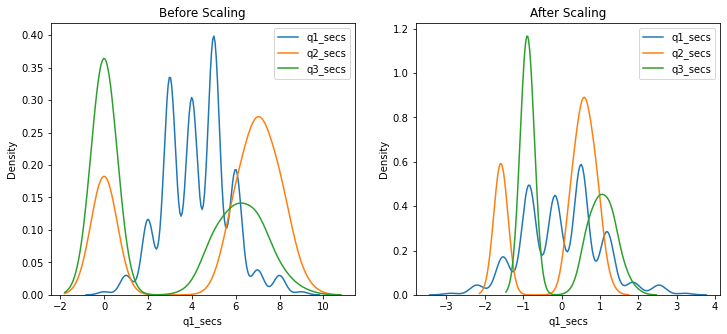

In [110]:
#comparing before and after scaling of numerical variables
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_bin['q1_secs'], ax=ax1, label ='q1_secs')
sns.kdeplot(X_train_bin['q2_secs'], ax=ax1, label ='q2_secs')
sns.kdeplot(X_train_bin['q3_secs'], ax=ax1, label ='q3_secs')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['q1_secs'], ax=ax2, label ='q1_secs')
sns.kdeplot(X_train_scaled['q2_secs'], ax=ax2, label ='q2_secs')
sns.kdeplot(X_train_scaled['q3_secs'], ax=ax2, label ='q3_secs')
ax2.legend()
plt.show()

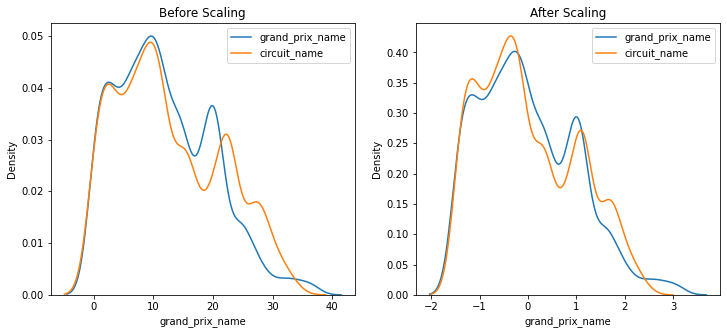

In [111]:
#comparing before and after scaling of numerical variables
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_bin['grand_prix_name'], ax=ax1, label ='grand_prix_name')
sns.kdeplot(X_train_bin['circuit_name'], ax=ax1, label ='circuit_name')
ax1.legend(loc = 'upper right')

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['grand_prix_name'], ax=ax2, label ='grand_prix_name')
sns.kdeplot(X_train_scaled['circuit_name'], ax=ax2, label ='circuit_name')

ax2.legend(loc = 'upper right')
plt.show()

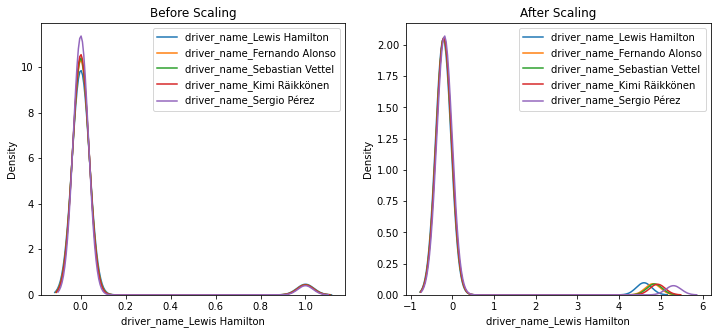

In [112]:
#comparing before and after scaling of numerical variables
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train_bin['driver_name_Lewis Hamilton'], ax=ax1, label ='driver_name_Lewis Hamilton')
sns.kdeplot(X_train_bin['driver_name_Fernando Alonso'], ax=ax1, label ='driver_name_Fernando Alonso')
sns.kdeplot(X_train_bin['driver_name_Sebastian Vettel'], ax=ax1, label ='driver_name_Sebastian Vettel')
sns.kdeplot(X_train_bin['driver_name_Kimi Räikkönen'], ax=ax1, label ='driver_name_Kimi Räikkönen')
sns.kdeplot(X_train_bin['driver_name_Sergio Pérez'], ax=ax1, label ='driver_name_Sergio Pérez')
ax1.legend(loc = 'upper right')

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['driver_name_Lewis Hamilton'], ax=ax2, label ='driver_name_Lewis Hamilton')
sns.kdeplot(X_train_scaled['driver_name_Fernando Alonso'], ax=ax2, label ='driver_name_Fernando Alonso')
sns.kdeplot(X_train_scaled['driver_name_Sebastian Vettel'], ax=ax2, label ='driver_name_Sebastian Vettel')
sns.kdeplot(X_train_scaled['driver_name_Kimi Räikkönen'], ax=ax2, label ='driver_name_Kimi Räikkönen')
sns.kdeplot(X_train_scaled['driver_name_Sergio Pérez'], ax=ax2, label ='driver_name_Sergio Pérez')

ax2.legend(loc = 'upper right')
plt.show()

### Step 8: Machine Learning Modelling <a id="model"></a>

#### Shape of train and test dataset

In [113]:
X_train_scaled.shape

(4513, 15)

In [114]:
X_test_scaled.shape

(1935, 15)

#### Naive Baseline Model

In [115]:
# pick the modal class from train data
y_labels = f1_df['target'].unique()

print(stats.mode(y_train))

modal_class_label = stats.mode(y_train)[0]

print(f"The modal class label is {int(modal_class_label)}, \
and the accompanying string value of this label is {y_labels[modal_class_label]}.")

ModeResult(mode=array([0]), count=array([3889]))
The modal class label is 0, and the accompanying string value of this label is [1].


In [116]:
y_train_preds_naive = [int(modal_class_label) for row in X_train_scaled.iloc[:,0]]
print(y_train_preds_naive[0:5])

[0, 0, 0, 0, 0]


In [117]:
y_test_preds_naive = [int(modal_class_label) for row in X_test_scaled.iloc[:,0]]
print(y_test_preds_naive[0:5])

[0, 0, 0, 0, 0]


In [118]:
#naive baseline model for classification

# train accuracy score
y_true = y_train
y_pred = y_train_preds_naive

train_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on train data is {train_accuracy_naive:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_naive

test_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on test data is {test_accuracy_naive:.2f}%.")

The Naive Baseline Model's accuracy on train data is 86.17%.
The Naive Baseline Model's accuracy on test data is 85.06%.


#### Logistic Regression Model

In [119]:
#log regression model 
logreg = LogisticRegression(solver='liblinear') # you can experiment with different combinations of multi_class and solver
# logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs') # good option for larger datasets, fails here
logreg.fit(X_train_scaled, y_train)

y_train_preds_logreg = logreg.predict(X_train_scaled)
y_test_preds_logreg = logreg.predict(X_test_scaled)

# train accuracy score
y_true = y_train
y_pred = y_train_preds_logreg

train_accuracy_logreg = accuracy_score(y_true, y_pred) * 100
print(f"The LogReg Model's accuracy on train data is {train_accuracy_logreg:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_logreg

test_accuracy_logreg = accuracy_score(y_true, y_pred) * 100
print(f"The LogReg Model's accuracy on test data is {test_accuracy_logreg:.2f}%.")

The LogReg Model's accuracy on train data is 90.52%.
The LogReg Model's accuracy on test data is 90.18%.


### Report <a id="report"></a>

#### [1. Introduction with value-based problem statement](#intror)
#### [2. Problem Formulation](#probr)
#### [3. Data Wrangling on multiple chosen tables and Data Cleansing](#mergencleanr)
#### [4. Transformation of Numerical Variables](#numericr)
#### [5. Categorical Data Encoding](#categoricalr)
#### [6. Variable Discretization / Binning](#binningr)
#### [7. Feature scaling](#scalingr)
#### [8. Machine Learning Model](#modelr)
#### [Summary and further improvements](#summaryr)

#### 1. Introduction with value-based problem statement <a id="intror"></a>

In this assignment, we will prepare the given Formula 1 (F1) related data for modelling to predict whether a particular driver will come in top 3 of a race. We were given 13 .csv files which consisted of data collected from the 1950 season until today, ranging from the results of the races, the information of the constructors and their drivers, the details of the races, the details of the circuit etc. We will then research on how each variable will affect the factors of winning and identify those useful variables before collating them into a single tabular dataset using data wrangling methods to solve the prediction problem. 

#### 2. Problem Formulation <a id="probr"></a>

Before crafting up the prediction problem to solve, I firstly familiarise myself with F1. From my research, F1 hosts races all over the world called grand prix every year. Drivers represent their respective teams and race at the grand prix. The driver who completes the race first wins the race.  

Keeping these information in mind, I then loaded and viewed the data in jupyter notebook to understand the different variables present in each of the .csv file given. I also used the data dictionary given to better understand the description, datatype and which variables are the primary keys in order to merge the different tables later. Below is my understanding of the different tables and the variables which I feel will need more clarification on. 

Status – Provides the explanation of what each statusid represents. 

Seasons – Provides the url link and the years of which F1 is held from 1950 onwards.

Results – Provides the relevant information about the results of each race for each driver. There are also a few foreign keys which will play a role in the merging of different tables later. 

Races – Shows the information about each race. The round number is the sequence of each race for a particular year. 

Qualifying – Shows data on the results of the qualifiers.

Pit Stops – Shows the information of each pit stop taken for each driver in a race. 

Lap Times – The time taken for each lap of each driver and race.  

Drivers – Information about the F1 drivers.

Driver Standings – Driver’s overall standings after each race.

Constructors – Information on the corporations competing in F1.

Constructor Standings – Constructor’s overall standings after each race.

Constructor Results – Data on the results of each constructor after every race.

Circuits – Information about each circuit. 

From the different tables, I realised that the data given is sufficient to help me to determine whether a driver will come in top 3 of a race. This prediction problem also adds value to people, especially what fans of F1 would like to know. I will be treating this problem as a classification problem since people would normally prefer a yes or no answer rather than the possibility of something happening, which will then be a regression problem. 

After that, I picked out the tables which consists of the variables that will be helpful in training the model and answering the prediction problem. I will also be addressing the findings that I found from exploring these variables and tables. How I dealt with some of the findings will be further explained in the ‘Data Wrangling on multiple tables and Data Cleansing’ section. Below are the tables and the variables in a particular table that will be useful. 

##### Races
The race table consists of the name of the race and the date it was held so that it will be easier to identify which race and season the driver will come top 3 in. The race and circuit ids are also needed since they will be used as reference when merging with the different tables on the same column later. I discovered that there were null and out of range values in the date column. Moreover, the datatype of the date and time were object instead of date time. 

##### Results
The variables in this table that will be useful are the various ids, grid and position order. The grid will show the starting order of each driver for the race and the position order will show the position they came in after the race. From my exploration, I realised that there are some drivers that came in the 99th position which does not make sense as there is only an average of 22-30 drivers in each race. Upon further exploration, I realised that in those races whereby drivers came in at that 99th position, there were no drivers coming in 1st. I then compared the milliseconds taken to finish the whole race and found out that drivers in the 99th position actually came in 1st. I also realised that there were drivers allocated to grid 0. This is because they are not taking part in the race as they did not manage to secure a spot based on the qualifiers. 

##### Qualifying
From the qualifying table, the various ids, position and the qualifying time of all 3 rounds is important. The position based on the qualifiers helps to determine the order of the grid allocated to the drivers. The recorded qualifying time of the 3 rounds will be useful in predicting whether the driver will come in top 3. From the exploration, I realised that there were null and ‘\N’ values in q1, q2 and q3, which are the timings of the laps in the qualifying rounds. 

##### Circuits
In this table, the altitude and the name of the circuits will be the most useful features. The difference in altitude can affect the various elements of the car the driver is using to race, which can affect the winning rate. The different circuits can also play a part in the winning factor as some drivers may fare better in a certain circuit. Moreover, the number of laps required for drivers to drive change based on the circuit. The circuit name will be able to identify which circuit the race is using. Other than that, the circuit id is also useful for merging of tables later. From my exploration, I realised that there are no null values but there are 2 rows of data under the ‘Alt’ column where it is not classified. 

##### Drivers
In the drivers table, the driver id, forename, surname and date of birth will be useful. The name of the driver will be able to identify which driver that came in top 3. With the date of birth, we will be able to find the age of the driver which is a factor that affects the rate of the drivers coming in top 3 of the race. 

##### Reasons for not using other tables
Even though knowing which constructors will be useful as different constructors have different technology in engines which can affect the chances of placing top 3, the table does not outline such details which can help the model to determine which constructors fared better. Since we are already using the results table, using the constructor standings and constructor results table will be misleading as it mainly consists of variables that reflects the final result of the race which will affect the training of the model. Moreover, these 3 tables will not provide much detail of which driver will come in top 3. 

The pit stops table is not used as the time is already calculated in the total time taken in the results table. Seasons is not used as it does not consist of a common field which can then merge this table with the other tables together. Status table is not used as it just mainly consists of what happened during the race which will not be useful apart from whether the driver was disqualified or finished the race which can be seen just by the timings in the results table. 

#### 3. Data Wrangling on multiple chosen tables and Data Cleansing <a id="mergencleanr"></a>

After identifying which tables and variables to use, I cleaned the data based on the findings, created new features, drop all irrelevant variables, and merged them into a single tabular data table. I did it in this order as it is easier and more organised to view and identify what is needed to be cleaned based on the individual table, rather than merging all the tables together first and cleaning everything as a single table. Below is what I have done in those tables that I have identified earlier. 

##### Races
By viewing the date column in this table, I felt that the year alone will be sufficient as it represents the season. Moreover, with Nan date values in the data, there is no date value for us to reference to and replace those values unlike year where we will be able to extract it from the url link. Hence, I want to extract out the year from the date. I tried to change the datatype of the date column from object to datetime so that it will be easier to extract out the year from the date. However, it gave an error where some of the dates were out of range.  
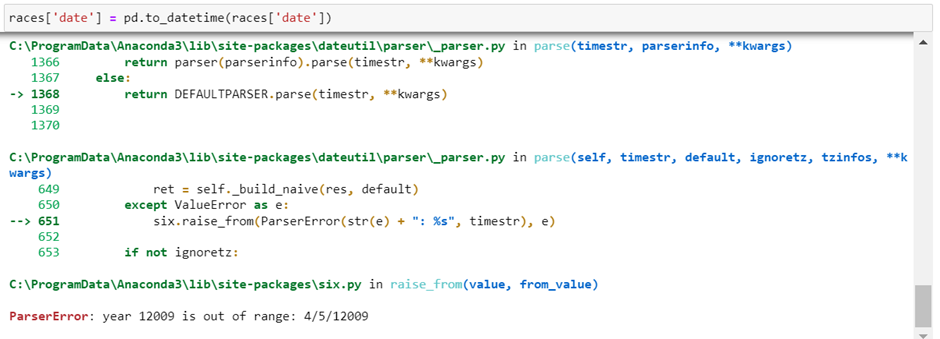
From the exploration earlier, it was identified that there were out of range values and null values in the date. I could drop those rows or replace them with a value. Dropping is not ideal as there is a way to replace those values with a year. Hence, I have to deal with those out-of-range values first. In my code, a loop was created to replace those dates that were out of range. I then changed the datatype of the date column to datetime and extracted the year and placed it in a new column. After dealing with that, I then extracted the year from the url link given and replaced those blank years with the extracted year from the url link associated with their row. The year is then changed to an integer datatype for computations. 

After that, I filtered the table to keep rows that were 2006 and after. This is because, the rules for having 3 rounds of qualifiers have been updated and affects races from 2006 and after. In races before 2006, qualifying only consisted of one or two rounds, resulting in some missing data in the qualifying table. It will be more beneficial to base my model on the most recent rule change as it will be able to train better and not be affected by the missing values in the variables of the qualifying dataset. Since it will be more ideal to gather the necessary data first before merging of the different tables together, I decided to filter to 2006 and after in the race table so that there is no need to filter after merging the tables together. 

For my final race table, I decided to drop the irrelevant columns and use race id, circuit id, name and year. 


##### Results
From my exploration of the results table as mentioned previously, there were position order values with 99 and upon further exploration, these values were meant to be 1 instead. Hence, I replaced those rows with 99 as its position order to 1.  

Since my problem is a classification problem, I represent those top 3 position order as one value. To do this, I created a target column whereby if the position order is in the top 3, it will be represented by 1, else 0. Position order is used as it consists of only numerical values and that it is already ordered in a way that it is possible to tell the rankings straight away. 

My final results table consists of result id, race id, driver id, grid and target by using subsetting. Other columns are removed as they either have nothing to do with determining whether a driver will come in top 3 of the race or the column consists of data that should not be available at the point of prediction. In this case, since we are predicting whether a driver will come in top 3 of the race, we should not have access to the time taken to complete the race since the race has yet to be concluded. 

##### Qualifying
In the qualifying table, there are null values for q1, q2 and q3. Hence, I replaced those null values with 0. I also replaced ‘\N’ with 0 as it means not classified. Both values are replaced with 0 because it will represent that no timing was recorded or shared which fits better, rather than putting it as null or ‘\N’ values. 

After that, I realised that there were some rows whereby the values for q1, q2 and q3 are all 0. I removed those rows from the table as it will affect the accuracy of the prediction. For example, there is an instance whereby a driver came in 1st , 2nd or 3rd in the qualifiers but have no timing which does not make sense. Hence, affecting the accuracy of the prediction. Apart from that, most of the values that have no timings at all have positions ranging in the 20s. This can mean that they did not participate in the qualifiers. If a driver did not participate in the qualifiers, they will not feature in the race. Thus, these rows are removed. Even though there are timings with 0 in q2 and q3, this is not a concern as the driver could have been eliminated on the first qualifier round

To convert the column into a float datatype and to make it easier for numerical transformation later, I converted the timings of q1, q2 and q3 columns from minutes and seconds to seconds and placed the converted timings in a new column, ‘q1_secs’,’q2_secs’ and ‘q3_secs’ respectively. After doing this, presence of Nan values resurfaces as the code I used required splitting which is not possible whereby the values are only 0. Hence, the Nan values were then replaced to 0 again. 

For the final qualifying table, the qualify id, race id, driver id, position, q1_secs, q2_secs and q3_secs were retained while the rest of the columns were dropped. 

##### Circuits 
There are no null values in this table. However, there are instances of ‘\N’ values in the alt column. Hence, I removed those rows since there is no reference to replace those values. By finding the mean or mode of the altitudes and replace those ‘\N’ values will not make sense as the altitude differs in different parts of the world. I also made sure that the datatype of the altitude column is changed to integer instead of object as it is a numerical variable. 

Hence, the final table of the circuits table consists of the circuit id, name and alt. I subsetted the columns I needed instead as there are too many columns to drop. 

##### Drivers
In this table, I combined each driver’s forename and surname into a new column named ‘driver_name’. Reason for doing this is because it helps to reduce the number of columns. Also, there could be instances whereby some drivers have the same forename or the same surname. Hence, combining it into a single column would be easier to identify which driver we are referring to, instead of having all the relevant surnames and forenames pop up. 

The final drivers table consists of the driver id, date of birth and the driver’s name. Date of birth is included so that the driver’s age can be calculated after the merging of the tables as it can affect the chances of placing top 3 in a race. 

##### Merging of tables
I chose to merge instead of doing joining as joining is used to combine tables based on the index which is not logical to do in this case as each table consists of different number of rows while merging combine tables based on the columns specified to join. I then merged all the cleaned and final tables into a single tabular table using inner join. Inner join will only retain the information from all the tables that are related to each other. Since the individual tables are already cleaned, inner joining will not introduce null values, whereas outer joining will. Even though there might be a loss of data rows by inner joining, but it helps to make the training model to be more accurate. This is because unlike outer joining which introduces null values, we will not need to do missing value imputation for these missing values which can lead to biasness of data. 

After merging the different datasets into one, I created a new column to calculate the age of the driver at the time where the race is conducted. As some of the columns have the same names, I then renamed them to be more specific. I changed the datatype of year, qualifying race and grid to an object datatype instead of integer since they are typically representing something and generally does not have any use for numerical calculations. I then checked the datatype of the other columns to make sure that they are correct and also check for null values. Since there are no missing values, there is no requirement to perform missing value imputation later on. Even though it could be seen that there are outliers especially for alt, I chose not to trim or cap it since it is legitimate data. 

Thus, my final table for modelling consists of the name of the grand prix, the year it was held in, the name of the circuit used, the altitude of where the race is being held, the qualifying position the driver placed in a particular race, the timings (in seconds) of each qualifying round, the driver name, the grid that they are allocated to in the race, target (shows whether the driver placed top 3 in the race) and the driver’s age. 

#### 4. Transformation of Numerical Variables <a id="numericr"></a>

After cleaning and merging of the tables into a single dataset, we will then do train test split to split the dataset into training and test dataset. We will then look at the distribution of the numerical variables in the dataset to see whether they are normally distributed. 
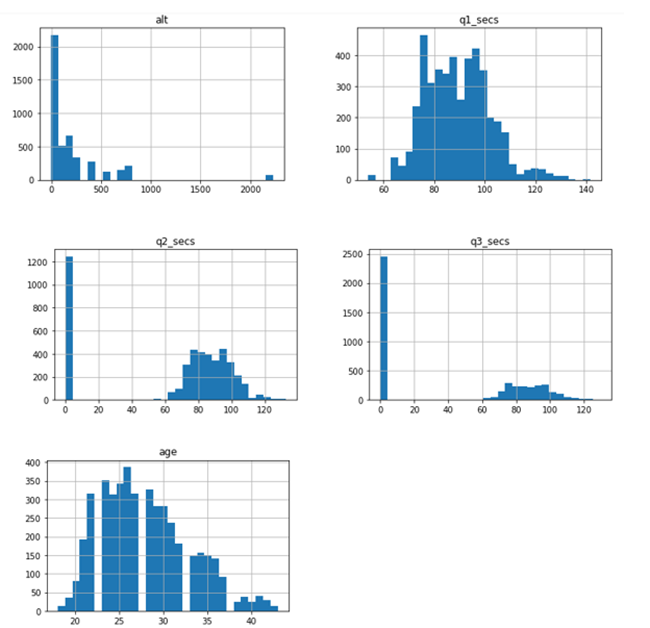
Based on the distributions, we can see that generally, the numerical variables are not normally distributed. Hence, we will be transforming those numerical variables to become more normally distributed. This will help to find the linear relationship between the numerical variables and target variable which could aid in the prediction of the model. For each numerical variable, I applied the different numerical transformation methods and compared the distribution of each method for each variable. I will then choose the method that offers the best transformation. If there are little changes compared to the original distribution or that the distribution of the original distribution is better, I will not be transforming those variables depending on the outcome of the model scores. 

##### alt
For ‘alt’, since there are negative values and 0s, only the Yeo-Johnson transformation can be applied. Thus, comparing the Q-Q plots before and after transformation, the distribution for after transformation is seen to be more normally distributed. Hence, for ‘alt’, I applied the Yeo-Johnson transformation. 

##### age
After comparing the different transformations, there were a few transformations that had a similar distribution. Hence, I choose it based on the model accuracy score which showed that Yeo-Johnson transformation resulted in the better model accuracy score. I also compared the distribution of the Yeo-Johnson transformation against the distribution before transformation and the verdict was that the distribution using Yeo-Johnson transformation was more normally distributed. 

##### q1_secs
Similarly, to what I did for age, I chose the transformation method that was the most normally distributed, then compared it against the distribution before transformation. Cube root transformation made the distribution the most normal. Hence, this transformation method was applied for q1_secs. 

##### q2_secs
For q2_secs, since it consists of 0 values, there were some transformation methods that could not be applied to this variable for transformation. Hence, out of all the transformation methods, the Yeo-Johnson transformation was the most normally distributed. However, when comparing this method with the distribution before transformation, the distribution was similar. Hence, I compared the model score. It could be seen that without transformation, even though the train score increased slightly, the test score dropped. Thus, I chose to apply the Yeo-Johnson transformation for q2_secs variable instead. 

##### q3_secs
When comparing the distribution of the transformed q3_secs variable, the distribution can be seen to be worse than before transformation. 
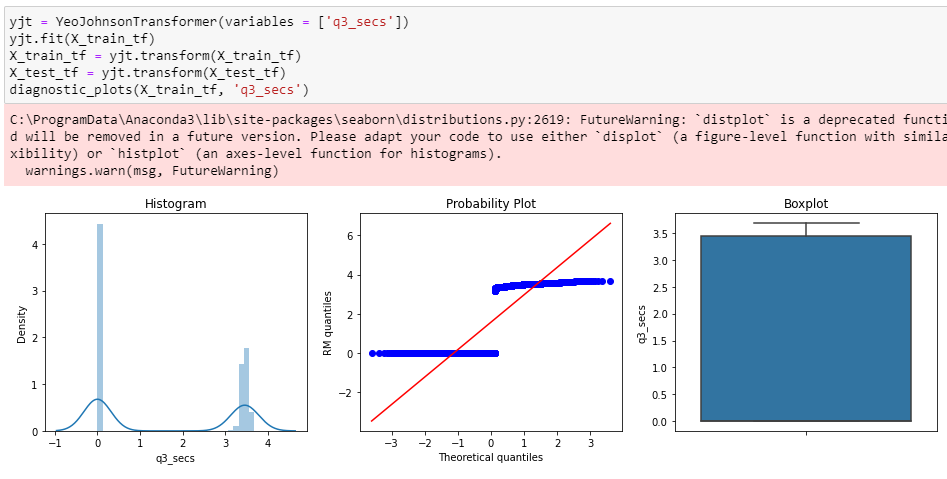
This is an example of the Yeo-Johnson transformation on this variable. Comparing it with the Q-Q plot before transformation, it can be seen that the distribution is more normal before transformation based on the probability plot. Hence, for q3_secs, no transformation was applied. 

#### 5. Categorical Data Encoding <a id="categoricalr"></a>

After the transformation of the numerical variables, there is a need to do categorical data encoding so that all the data are in numerical format to be passed into the model as most models are not able to handle data with categorical variables. 

Initially, I wanted to use ordinal encoding for all the categorical variables. However, there was an instance whereby Nan values were introduced in the driver names column. 

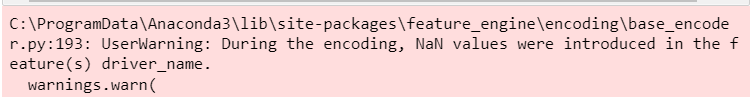

This is due to some drivers who only participated in one race. When doing train test split, the data is randomly split into the train and test dataset. This error shows that there is an instance whereby a driver that only participated in only one race is assigned to the test dataset. When encoding categorical variables, the train model will generate the encoding dictionary so that the test dataset can reference from the encoding dictionary to encode the categorical variables. In this case, since the row where the driver that participated in only one race is assigned to the test dataset, it is unable to reference based on the encoding dictionary as there is no rows with the same driver’s name in the train dataset. Hence, one hot encoding of top categories will be used for the driver name variable. This way, only one hot encoding of the most frequent categories will be performed. The rest of the categories will be represented as a single category which will prevent the error from occurring. 

For the other categorical variables, I will be using ordered ordinal encoding for year, qualifying position and grid while I will be using arbitrary ordinal encoding for grand prix name and circuit name. The difference between ordered and arbitrary is that for ordered, an integer value will be assigned based on an alphabetical or numerical order while for arbitrary it will be assigned based on first seen first serve basis. 

#### 6. Variable Discretization / Binning <a id="binningr"></a>

 Variable Discretization or binning, is done on numerical variables that are continuous to transform them into discrete variables to change the distribution of skewed variables, minimise the influence of outliers and also to improve the performance of the machine learning model. In this case, age, alt, q1_secs, q2_secs and q3_secs are continuous variables. 
 
 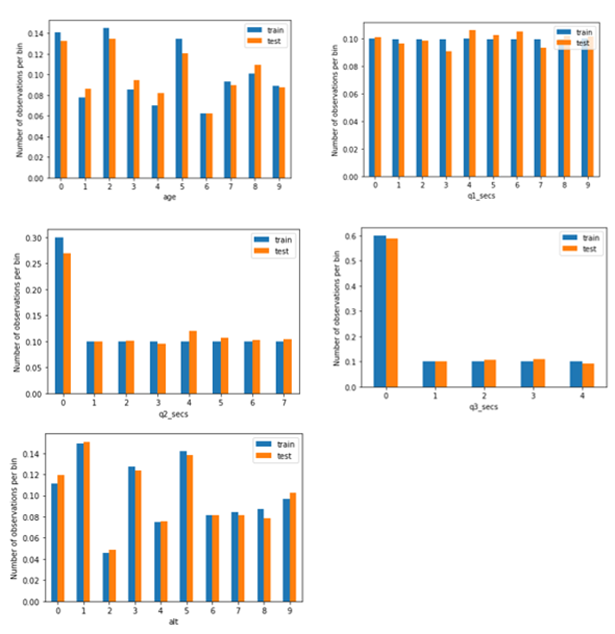
 
The above shows the distribution of the variables when using equal frequency. When comparing it to the distribution of the variables using intervals of equal width, using equal width generally results in a more normal distribution than using equal frequency. Hence, equal width method is applied to those continuous numerical variables. 

#### 7. Feature scaling <a id="scalingr"></a>

As different variables consist of different ranges of numerical values, there is a need to standardise all the variables in a fixed range as many machine learning algorithms are sensitive to the scale and the magnitude of the variables. If scaling is not done, the machine learning algorithm will regard greater values as higher and smaller values as lower, regardless of the unit of the values and impact the model differently. This will result in the machine learning algorithm to give wrong predictions and hence, very important to do feature scaling. Doing scaling will also help the algorithm to be faster and improve the model performance. 

I applied the different methods of scaling and see which one helped to improve my model’s score the most before deciding on the final technique to use. The final scaling method I chose was standardisation as it gave the best model performance results. 

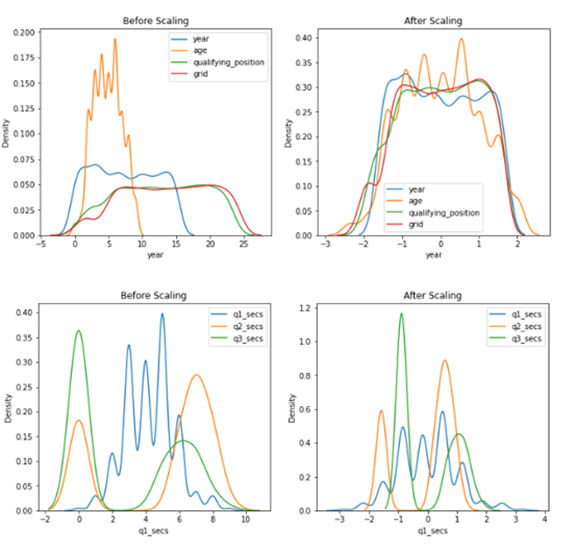
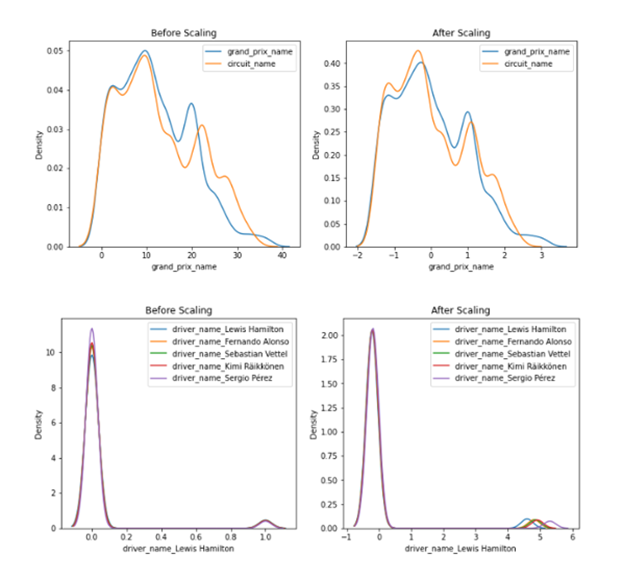

From the visualisations above, we can see that after scaling, the variables can be seen to be more normally distributed. Another reason for choosing standardization over the other methods is because it is generally the most common method of scaling, the values are not bounded to a certain range and it is not very affected by outliers. 

#### 8. Machine Learning Model <a id="modelr"></a>

After preparing the data for modelling, we will have 4513 rows and 15 columns for X train and 1935 rows and 15 columns for X test. 
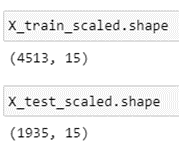

##### Naive Baseline Model
We will now build and evaluate different classification models against a Naïve Baseline Model. A Naïve Baseline Model is a model that provides a baseline to tell whether a model is considered skillful. It can also show which features is deemed to be the most significant which is helpful as it will show whether the model is neglecting important features. The model performance of other models should not be below the performance of the naïve baseline model, else it shows that the dataset lacks predictive power. Hence, the Naïve Baseline Model helps to tell whether a model is being trained with faulty data which can help to save time. 

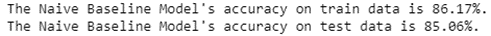

Above is the Naive Baseline Model's accuracy on train and test data.

##### Logistic Regression and Decision Tree Model

Apart from the Naïve Baseline Model, I will also be building a Logistic Regression and Decision Tree model. These are the models generally used to predict classification questions. I will be comparing and evaluating the performance of both models and then deciding which model to use based on the performance. 

##### Final model
For my final model, I chose the best data pre-processing and transformation methods which not only gave my models the highest score, but also did not overfit. 
-	No capping of outliers
-	Cube root, y=Yeo-Johnson transformations applied 
-	One hot encoding of top categories, ordered ordinal encoding, arbitrary ordinal encoding used
-	Equal Width Discretization applied to do binning
-	Using of Standardisation to scale

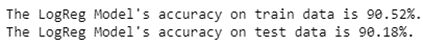


I chose to use the logistic regression model as my final model as based on the different trials, the accuracy score on the train and test data is closer to each other compared to using decision tree model. 

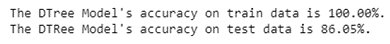

This shows that there is generally no overfitting and that the closer the accuracy score on the train and test data is, the better the fit of the data to the model. 

##### Trial 1
For my 1st trial, I used the most standard and common transformation methods as a guide to improve my model in future trials. 
-	Yeo-Johnson transformation on numerical variables
-	One hot encoding of top categories on categorical variables
-	Equal Width Discretization applied to do binning
-	Using of Standardisation to scale

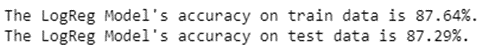
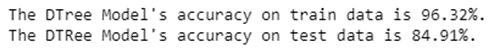

Subsequently, with trial 1 as a reference trial, I then experimented on the different transformation methods and replaced it with the transformation methods that suits best. 

##### Trials 2-7
For trials 2-7, I experimented with the different transformation methods on the age variable. In the end, I chose to transform it with Yeo-Johnson transformation as it gave a better distribution. With the rest of the transformations, the model performance could be seen to decrease. Hence, the model performance is the same as trial 1.

##### Trials 8-13
For trials 8-13, different transformation methods were applied on the alt variable. Yeo-Johnson transformation is applied with the same reason as the age variable. The model performance is the same as in trial 1. 

##### Trials 14-19
For trials 14-19, different transformation methods were applied on the q1_secs variable and cube root transformation was the finalised transformation to be used on q1_secs variable.

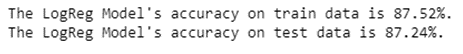
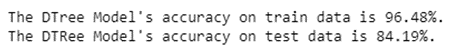

It can be seen that the model performance generally decreased. However, we are focusing on how well the transformation method can make the variable more normally distributed instead as it is easier to predict a variable and find its probability within a range of values. Hence, I will still be going ahead with cube root transformation for q1_secs variable. 

##### Trials 20-25
For trials 20-25, different transformation methods were once again applied but on q2_secs variable. Yeo-Johnson transformation was used as the model performance was the best amongst the other transformation methods on this variable and the distribution was the most normal. The model performance is the same as in trials 14-19.

##### Trials 26-32
For trials 26-32, I experimented with the different transformation methods on q3_secs variable. The distribution of this variable was better when there was no transformation applied. Hence, I chose not to transform this variable even though the accuracy generally dropped slightly in both models. 

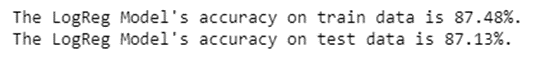
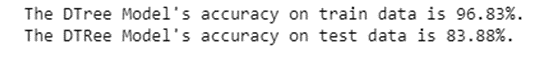

##### Trial 33
After transforming all the numerical variables, I experimented with the encoding of the categorical variables. Since using one hot encoding for all the categorical variables will produce many columns, in order to reduce it, I applied the different suitable ordinal encoding methods on different variables. 

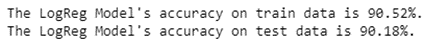
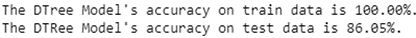

From the model performance, it showed that this step was justifiable as the model performance increased. 

##### Trial 34
For trial 34, I tried using equal frequency discretization for binning instead of equal width discretization.

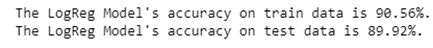
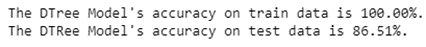

By using equal frequency discretization, even though the model performance increased more for the training data for logistic regression model and test for the decision tree model, I chose to use equal width instead. This is because equal width gave a better balance of increment on both accuracy for the train and test data. 

##### Trials 35-39
For trials 35-39, I tried using the different feature scaling methods. When trying out the different scaling methods, generally, the train score can be seen to increase while test score decreases. This shows that there is a possibility of overfitting. Hence, I chose the scaling method where both the train and test score increased the most and that method is standardisation. The model performance will be the same is in trial 33. 

##### Trial 40
Since I did not remove “outliers” as I deemed it to be legitimate data, I was curious on how the capping of the outliers will affect the model performance. Hence, for trial 40, I capped the outliers in alt variable. 

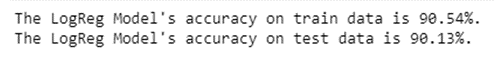
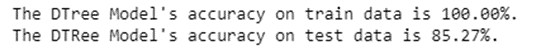

However, it can be seen that the model performance results decreased for the test data for both models. Hence, it shows that the outliers is important to be kept in the model. 

#### Summary and further improvements <a id="summaryr"></a>

In order to make the best model for predicting, research on the topic is needed to understand which variables are relevant to determine the prediction problem formulated. With my prediction problem being ‘Will a certain driver come in top 3 of the race?’, I also needed to take note of whether the variables I used, apart from the target, are available at the point of prediction. If it should not be available, fitting this data into the model will cause the model to be biased and useless as the answer is already given in the data. The outliers in this case is important as the model performance decreased after the capping of it, proving that it is needed. 

Generally, the decision tree model produces better train results. However, there is quite a large gap between the train and test results as compared to using a logistic regression model. This can mean that it is prone to overfitting when using the decision tree model since the accuracy is far apart. The train accuracy for the logistic regression model is much lower than the decision tree model’s train accuracy but the test accuracy for the logistic regression model is much higher than the decision tree model’s accuracy. Hence, in this case, it will be better to use the logistic regression model as it is lesser prone to overfitting, yet the accuracy of the prediction is still high. 

For this assignment, since the variables I used were those that will have a major effect on the chances of a driver coming in top 3 of the race, some improvements that can be made is to introduce more variables, such as the pit stop timing to see whether a driver is staying there longer than other drivers which may affect his chances of coming in top 3, or even introduce the weather condition (not found in given datasets) to help train the model further in order to predict the most accurate results based on different factors. 